**ESTE LABORATORIO ES PARA LA SESION 01**

La siguiente celda realiza la carga de librerias requeridas para esta practica

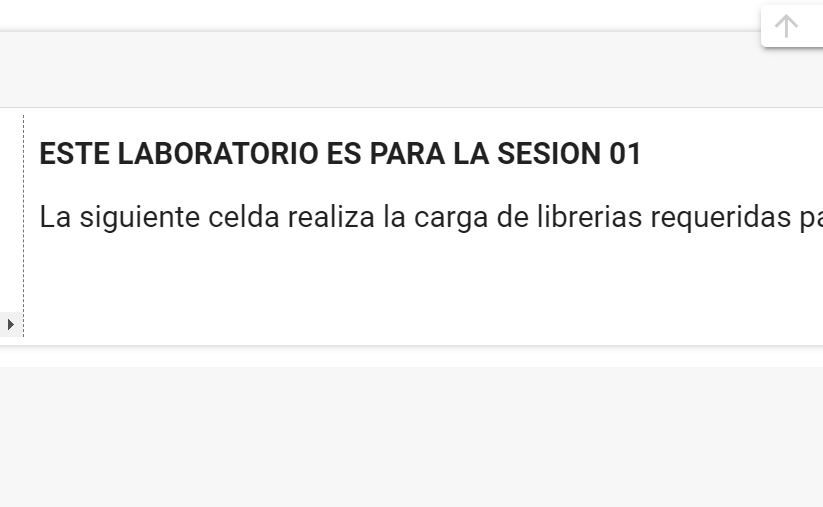

In [1]:
# Numpy y pandas
import numpy as np
import pandas as pd

# Scikit-Learn para ajustar los modelos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Para poder graficar en el notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Parametros por defecto para los plots
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.titlesize'] = 16
matplotlib.rcParams['figure.figsize'] = [9, 7]

In [16]:

# Seteamos la semilla aleatoria
np.random.seed(42)

# "True" funcion que representa un proceso del mundo real
def true_gen(x):
    y = np.sin(1.2 * x * np.pi)
    return(y)

# x e y value con un pequeño ruido aleatorio
x = np.sort(np.random.rand(120))
print(x)
y = true_gen(x) + 0.1 * np.random.randn(len(x))
print(y)

[0.00552212 0.02058449 0.02541913 0.03142919 0.03438852 0.04522729
 0.04645041 0.05808361 0.06355835 0.06505159 0.07404465 0.07455064
 0.07697991 0.0884925  0.09767211 0.10789143 0.11586906 0.11959425
 0.12203823 0.13949386 0.14092422 0.15599452 0.15601864 0.16122129
 0.17052412 0.18182497 0.18340451 0.18485446 0.18657006 0.19598286
 0.19871568 0.19967378 0.21233911 0.22879817 0.24929223 0.25877998
 0.27134903 0.28093451 0.28975145 0.29122914 0.29214465 0.30424224
 0.30461377 0.31098232 0.31171108 0.31435598 0.32518332 0.32533033
 0.33089802 0.35675333 0.35846573 0.36636184 0.37454012 0.38867729
 0.41038292 0.42754102 0.43194502 0.44015249 0.45606998 0.47221493
 0.4937956  0.49517691 0.50857069 0.51423444 0.52006802 0.52273283
 0.52475643 0.53934224 0.54269608 0.54671028 0.5612772  0.59241457
 0.59789998 0.59865848 0.60111501 0.60754485 0.61185289 0.62329813
 0.63340376 0.63641041 0.63755747 0.66252228 0.68423303 0.70685734
 0.70807258 0.71324479 0.72900717 0.72960618 0.73199394 0.7555

In [17]:
# Se generan indices aleatorios para crear conjuntos de entrenamiento y prueba
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
xt = x[random_ind]
yt = y[random_ind]

# Observaciones de entrenamiento y prueba
train = xt[:int(0.7 * len(x))]
test = xt[int(0.7 * len(x)):]

y_train = yt[:int(0.7 * len(y))]
y_test = yt[int(0.7 * len(y)):]

# Modelo de la 'funcion real'
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

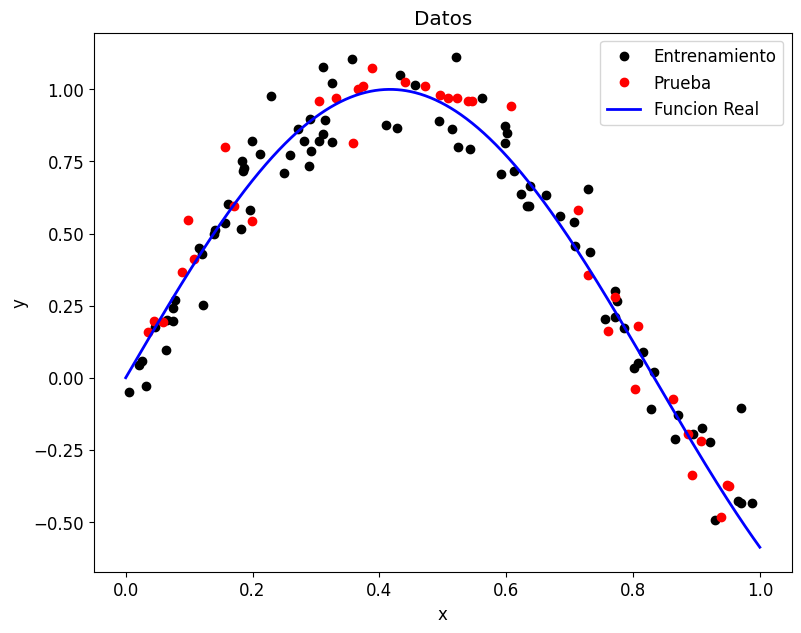

In [33]:
# Visualiza las observaciones y la 'funcion real'
plt.plot(train, y_train, 'ko', label = 'Entrenamiento');
plt.plot(test, y_test, 'ro', label = 'Prueba')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'Funcion Real')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Datos');

In [37]:
def fit_poly(train, y_train, test, y_test, degrees, plot='train', return_scores=False):

    # Crea una transformacion polinomial de las variables
    features = PolynomialFeatures(degree=degrees, include_bias=False)

    # Reshape variables de entrenamiento para uso en scikit-learn variables de transformacion
    train = train.reshape((-1, 1))
    train_trans = features.fit_transform(train)

    # Crea un modelo de regresion lineal y entrenamiento
    model = LinearRegression()
    model.fit(train_trans, y_train)

    # Calcula el score de la validacion cruzada
    cross_valid = cross_val_score(model, train_trans, y_train, scoring='neg_mean_squared_error', cv = 5)

    # Predicciones de entrenamiento y error
    train_predictions = model.predict(train_trans)
    training_error = mean_squared_error(y_train, train_predictions)

    # Formatea variables de prueba
    test = test.reshape((-1, 1))
    test_trans = features.fit_transform(test)

    # Prueba conjunto de predicciones y error
    test_predictions = model.predict(test_trans)
    testing_error = mean_squared_error(y_test, test_predictions)

    # Encuentra la curva real y la curva del modelo
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape((-1, 1))
    x_curve_trans = features.fit_transform(x_curve)

    # Curva del Modelo
    model_curve = model.predict(x_curve_trans)

    # Curva Real
    y_true_curve = true_gen(x_curve[:, 0])

    # Plotea las observaciones, 'funcion real', y funcion del modelo predictivo
    if plot == 'train':
        plt.plot(train[:, 0], y_train, 'ko', label = 'Observaciones')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'Funcion Real')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Funcion Modelo')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Grado del Modelo en la Data de Entrenamiento'.format(degrees))
        plt.show()

    elif plot == 'test':
        # Plotea las observaciones de prueba y predicciones de prueba
        plt.plot(test, y_test, 'o', label = 'Observaciones de Prueba')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'Funcion Real')
        plt.plot(test, test_predictions, 'ro', label = 'Predicciones de Prueba')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y'); plt.title('{} Grado del Modelo en la Data de Prueba'.format(degrees)), plt.show();

    # Retorna la metrica
    if return_scores:
        return training_error, testing_error, -np.mean(cross_valid)

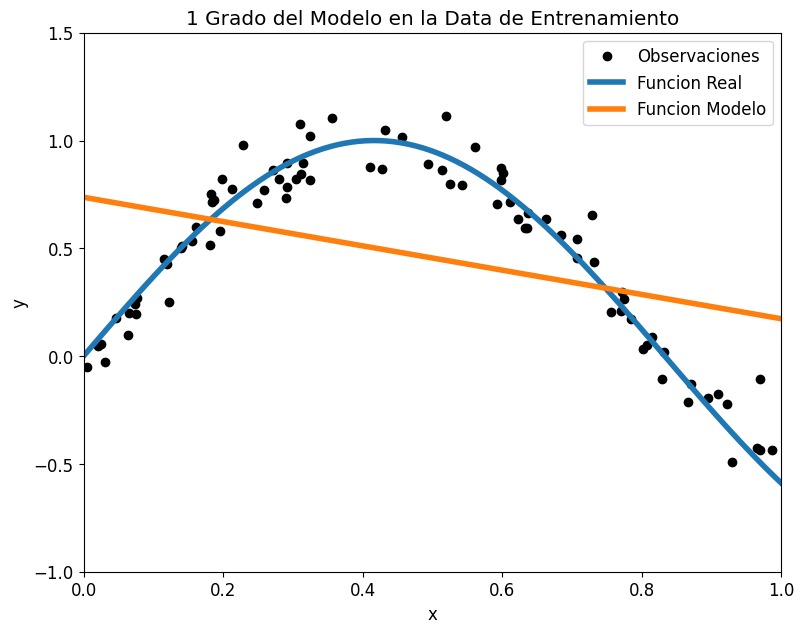

In [38]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

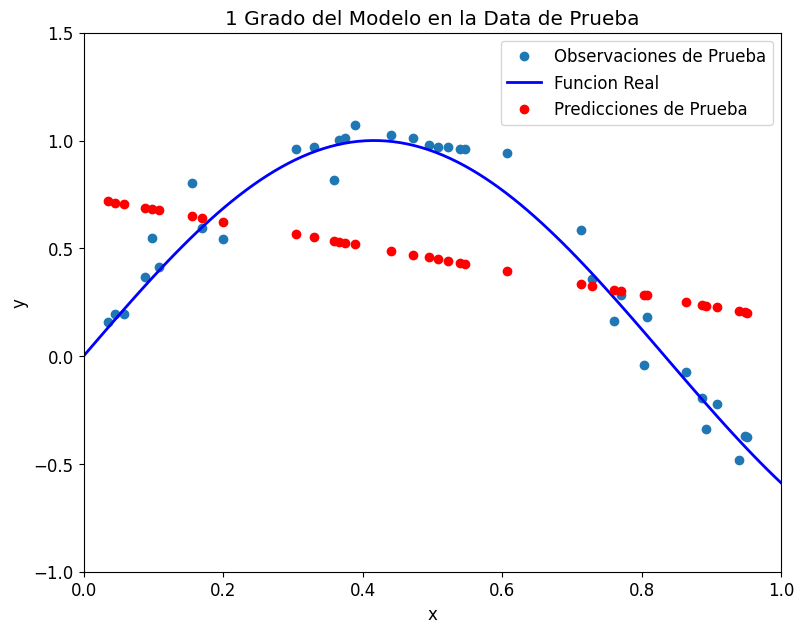

In [39]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='test')

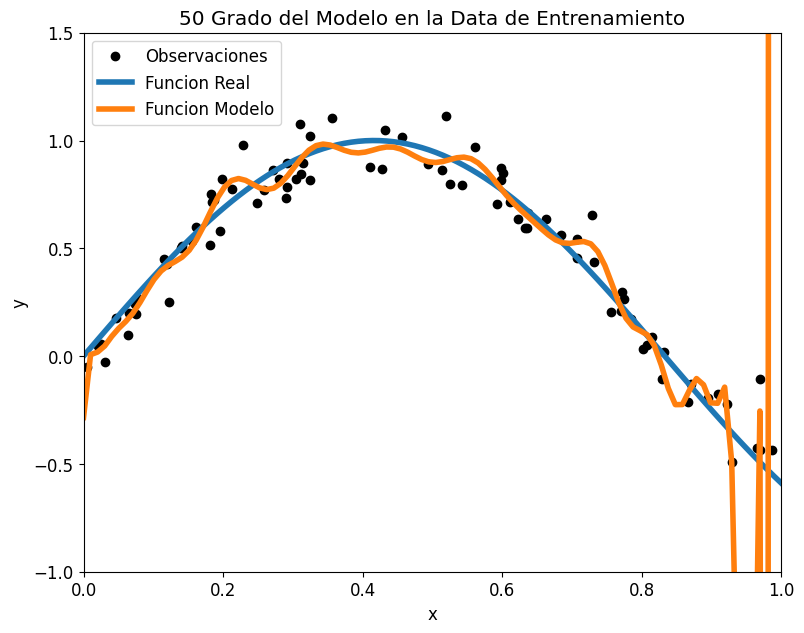

In [40]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 50)

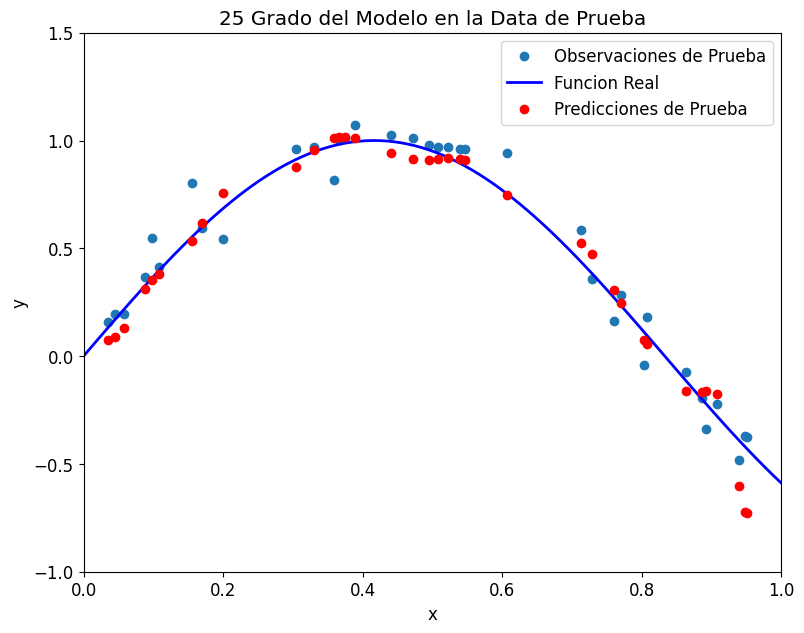

In [41]:
fit_poly(train, y_train, test, y_test, degrees=25, plot='test')

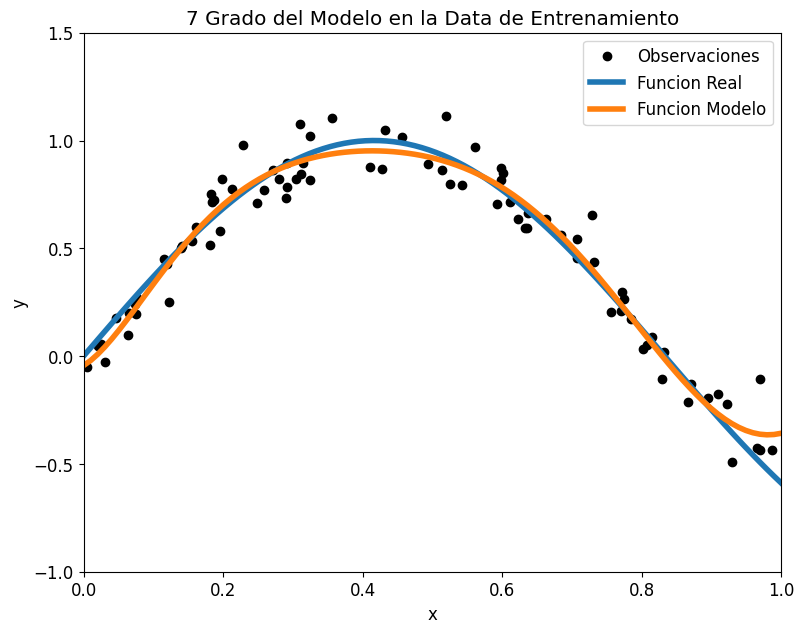

In [42]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 7)

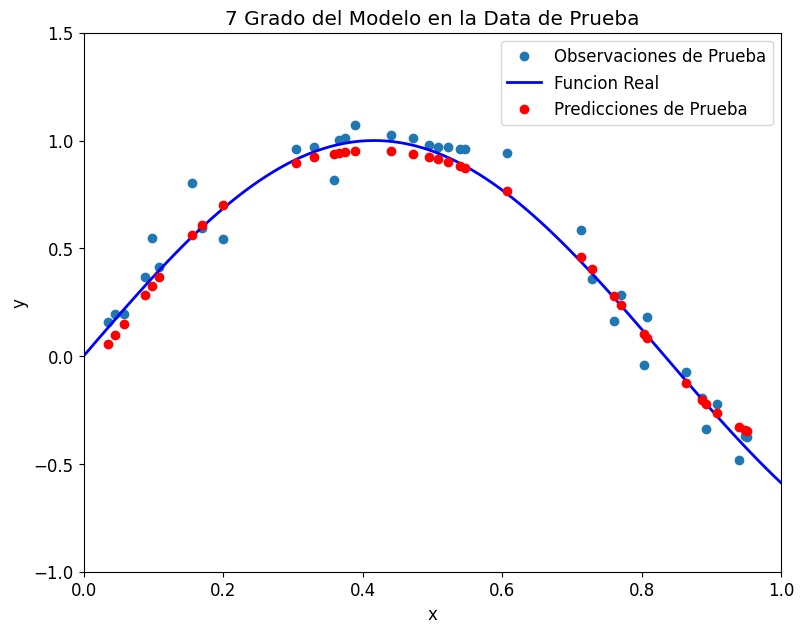

In [43]:
fit_poly(train, y_train, test, y_test, degrees=7, plot='test')

In [44]:
# Range of model degrees to evaluate
degrees = [int(x) for x in np.linspace(1, 40, 40)]

# Dataframe con los resultados
results = pd.DataFrame(0, columns = ['train_error', 'test_error', 'cross_valid'], index = degrees)

# Probar todos los grados para el modelo y grabar los resultados
for degree in degrees:
    degree_results = fit_poly(train, y_train, test, y_test, degree, plot=False, return_scores=True)
    results.loc[degree, 'train_error'] = degree_results[0]
    results.loc[degree, 'test_error'] = degree_results[1]
    results.loc[degree, 'cross_valid'] = degree_results[2]

In [45]:
print('10 Mas bajos errores de Validacion Cruzada\n')
train_eval = results.sort_values('cross_valid').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'cross_valid']] .head(10)

10 Mas bajos errores de Validacion Cruzada



,degrees,cross_valid
0,4,0.010549
1,5,0.010637
2,7,0.010665
3,6,0.010887
4,8,0.011182
5,3,0.011695
6,9,0.011757
7,11,0.011769
8,10,0.011902
9,12,0.012642


El minimo error de validacion cruzada ocurre en 3 grados.



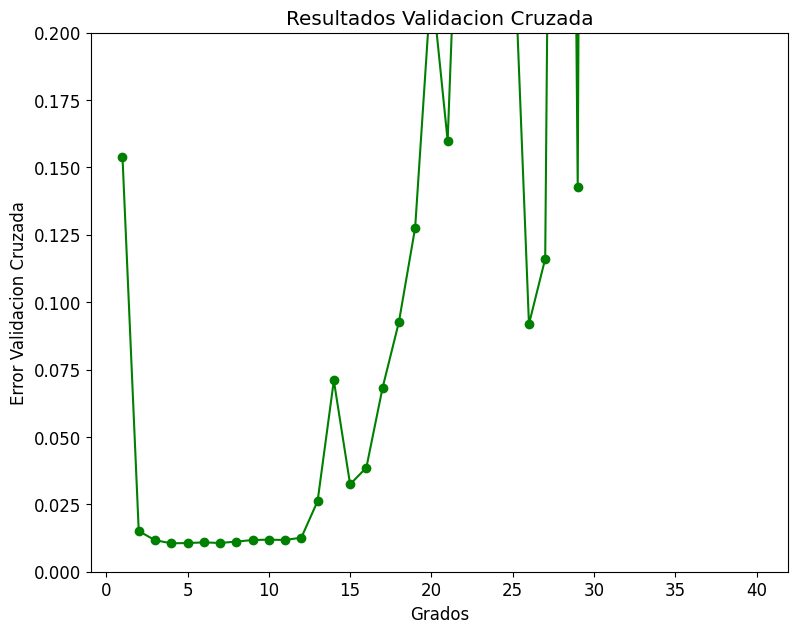

In [46]:
plt.plot(results.index, results['cross_valid'], 'go-', ms=6)
plt.xlabel('Grados'); plt.ylabel('Error Validacion Cruzada'); plt.title('Resultados Validacion Cruzada');
plt.ylim(0, 0.2);
print('El minimo error de validacion cruzada ocurre en {} grados.\n'.format(int(np.argmin(results['cross_valid']))))

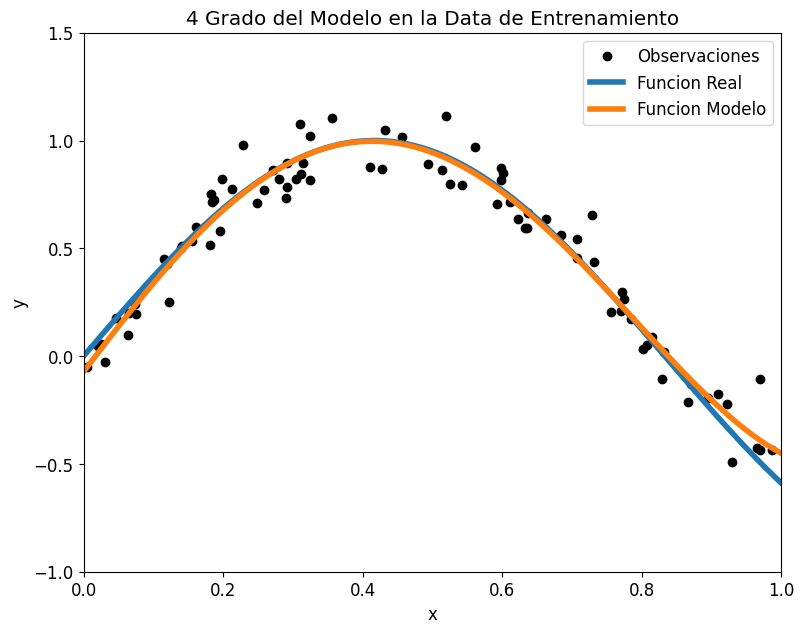

In [47]:
fit_poly(train, y_train, test, y_test, degrees=4, plot='train')

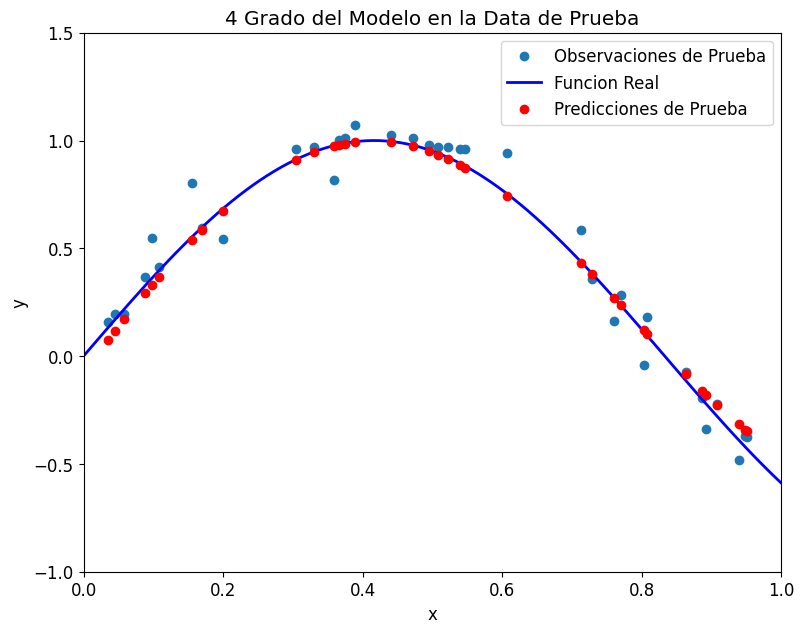

In [48]:
fit_poly(train, y_train, test, y_test, degrees=4, plot='test')

In [ ]:
print('10 Mas Bajos Errores de Entrenamiento\n')
train_eval = results.sort_values('train_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'train_error']] .head(10)

10 Mas Bajos Errores de Entrenamiento



,degrees,train_error
0,36,0.006089
1,35,0.006137
2,40,0.006210
3,39,0.006261
4,31,0.006351
5,27,0.006378
6,32,0.006401
7,28,0.006422
8,33,0.006434
9,29,0.006469


In [ ]:
print('10 Mas Bajos Errores de Prueba\n')
train_eval = results.sort_values('test_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'test_error']] .head(10)

10 Mas Bajos Errores de Prueba



,degrees,test_error
0,5,0.009482
1,6,0.010215
2,4,0.010483
3,8,0.010609
4,7,0.010618
5,9,0.010754
6,14,0.011216
7,10,0.011321
8,11,0.011342
9,13,0.011387


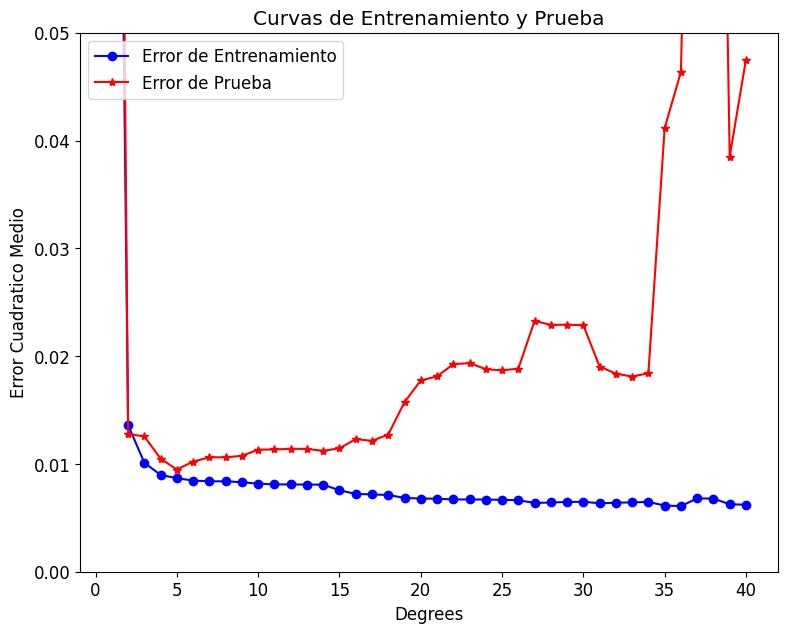


Minimo Error de Entrenamiento ocurre a 35 grados.
Minimo Error de Prueba ocurre a 4 grados.



In [ ]:
plt.plot(results.index, results['train_error'], 'b-o', ms=6, label = 'Error de Entrenamiento')
plt.plot(results.index, results['test_error'], 'r-*', ms=6, label = 'Error de Prueba')
plt.legend(loc=2); plt.xlabel('Degrees'); plt.ylabel('Error Cuadratico Medio'); plt.title('Curvas de Entrenamiento y Prueba');
plt.ylim(0, 0.05); plt.show()

print('\nMinimo Error de Entrenamiento ocurre a {} grados.'.format(int(np.argmin(results['train_error']))))
print('Minimo Error de Prueba ocurre a {} grados.\n'.format(int(np.argmin(results['test_error']))))